# Packages 

In [34]:
import pandas as pd
import numpy as np
import scipy as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Data

In [2]:
credits= pd.read_csv('credits.csv')
titles= pd.read_csv('titles.csv')

In [3]:
credits

person_id         id                   name  \
0          60017   tm155702           Judy Garland   
1          53496   tm155702             Ray Bolger   
2          79549   tm155702             Jack Haley   
3          79548   tm155702              Bert Lahr   
4          60995   tm155702      Margaret Hamilton   
...          ...        ...                    ...   
66388    1224011  tm1067128           Stella Lauri   
66389    2305342  tm1067128        Fabiola Sánchez   
66390    1245864  tm1067128            Ash Olivera   
66391    2305203  tm1067128  Mariel Garcia Spooner   
66392    1742757   tm989132    Richard Butterworth   

                                     character      role  
0                                 Dorothy Gale     ACTOR  
1                             Hunk / Scarecrow     ACTOR  
2                            Hickory / Tin Man     ACTOR  
3                         Zeke / Cowardly Lion     ACTOR  
4      Elmira Gulch / Wicked Witch of the West     ACTOR  
...                                        ...       ...  
66388                                    Marta     ACTOR  
66389                                  Claudia     ACTOR  
66390                                     Nora     ACTOR  
66391                                      NaN  DIRECTOR  
66392                                      NaN  DIRECTOR  

[66393 rows x 5 columns]

In [4]:
titles

id                                           title   type  \
0      tm155702                                The Wizard of Oz  MOVIE   
1       tm83648                                    Citizen Kane  MOVIE   
2       tm77588                                      Casablanca  MOVIE   
3       tm82363                                   The Big Sleep  MOVIE   
4       tm84701                              The Maltese Falcon  MOVIE   
...         ...                                             ...    ...   
3289  tm1082718  Romeo Santos: Utopia Live from MetLife Stadium  MOVIE   
3290  tm1067128                                       Algo Azul  MOVIE   
3291  tm1121489                        Entre Nos: What She Said  MOVIE   
3292  tm1121486                        Entre Nos: The Winners 2  MOVIE   
3293   tm989132                             The Infamous Future  MOVIE   

                                            description  release_year  \
0     Young Dorothy finds herself in a magical world...          1939   
1     Newspaper magnate, Charles Foster Kane is take...          1941   
2     In Casablanca, Morocco in December 1941, a cyn...          1942   
3     Private Investigator Philip Marlowe is hired b...          1946   
4     A private detective takes on a case that invol...          1941   
...                                                 ...           ...   
3289  In this Concert he focuses on the star and mos...          2021   
3290                     Romantic comedy...coming soon.          2021   
3291  A stand-up comedy special featuring Shari Diaz...          2021   
3292  Comedy special starring winners of the second ...          2021   
3293  The untold story of New York City's Eagle Acad...          2021   

     age_certification  runtime                            genres  \
0                    G      102             ['fantasy', 'family']   
1                   PG      119                         ['drama']   
2                   PG      102       ['drama', 'romance', 'war']   
3                  NaN      116             ['thriller', 'crime']   
4                  NaN      100  ['thriller', 'romance', 'crime']   
...                ...      ...                               ...   
3289               NaN      103              ['romance', 'music']   
3290               NaN       90                        ['comedy']   
3291               NaN       28                        ['comedy']   
3292               NaN       28                        ['comedy']   
3293               NaN       40                 ['documentation']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']      NaN   tt0032138         8.1    389774.0   
1                  ['US']      NaN   tt0033467         8.3    433804.0   
2                  ['US']      NaN   tt0034583         8.5    558849.0   
3                  ['US']      NaN   tt0038355         7.9     84494.0   
4                  ['US']      NaN   tt0033870         8.0    156603.0   
...                   ...      ...         ...         ...         ...   
3289               ['PR']      NaN         NaN         NaN         NaN   
3290               ['PA']      NaN   tt9257620         5.9        50.0   
3291                   []      NaN  tt15532762         NaN         NaN   
3292                   []      NaN  tt15532736         NaN         NaN   
3293               ['US']      NaN   tt9064760         NaN         NaN   

      tmdb_popularity  tmdb_score  
0              41.442         7.6  
1              14.383         8.0  
2              20.087         8.2  
3              12.911         7.7  
4              12.788         7.8  
...               ...         ...  
3289            8.425         8.1  
3290            1.400         2.0  
3291              NaN         NaN  
3292              NaN         NaN  
3293            1.101         5.3  

[3294 rows x 15 columns]

# EDA / CLEANING DATA

In [5]:
titles.describe()

release_year      runtime     seasons   imdb_score    imdb_votes  \
count   3294.000000  3294.000000  756.000000  2922.000000  2.911000e+03   
mean    2001.194293    80.914997    2.998677     6.883949  6.461835e+04   
std       23.542337    38.475347    3.651181     1.059668  1.754617e+05   
min     1901.000000     1.000000    1.000000     1.500000  5.000000e+00   
25%     1995.000000    51.250000    1.000000     6.300000  9.245000e+02   
50%     2010.000000    89.000000    2.000000     7.000000  8.071000e+03   
75%     2018.000000   106.000000    4.000000     7.600000  4.764500e+04   
max     2022.000000   255.000000   52.000000     9.400000  2.555504e+06   

       tmdb_popularity   tmdb_score  
count      3261.000000  3026.000000  
mean         21.105891     6.850099  
std          89.137800     1.081377  
min           0.050393     1.000000  
25%           3.450000     6.200000  
50%           8.561000     6.900000  
75%          17.711000     7.500000  
max        4447.894000    10.000000

In [6]:
# Missing Values 
missing_values = titles.isna().sum()

print(missing_values[missing_values > 0])

description            12
age_certification    1208
seasons              2538
imdb_id               326
imdb_score            372
imdb_votes            383
tmdb_popularity        33
tmdb_score            268
dtype: int64


In [7]:
titles['production_countries'].value_counts()

production_countries
['US']                      2077
['GB']                       147
['JP']                       129
[]                           110
['GB', 'US']                  64
                            ... 
['AU', 'US', 'DE']             1
['IT', 'US', 'GB', 'RO']       1
['DE', 'GB', 'CZ']             1
['US', 'GB', 'FR', 'DE']       1
['PA']                         1
Name: count, Length: 268, dtype: int64

In [8]:
titles['production_countries'] = titles['production_countries'].str.replace('[\[\]\'\"]', '', regex=True)


In [9]:
titles['production_countries'].value_counts()

production_countries
US                2077
GB                 147
JP                 129
                   110
GB, US              64
                  ... 
AU, US, DE           1
IT, US, GB, RO       1
DE, GB, CZ           1
US, GB, FR, DE       1
PA                   1
Name: count, Length: 268, dtype: int64

In [10]:
distinct_values_dict = {}
for index, row in titles.iterrows():
    # Split the values in the column
    values = [value.strip() for value in row['production_countries'].split(',')]
    # Add distinct values to the dictionary
    for value in values:
        if value not in distinct_values_dict:
            distinct_values_dict[value] = 1 
        distinct_values_dict[value] +=1
print(distinct_values_dict)

{'US': 2443, 'JP': 160, 'GB': 329, 'DE': 109, 'IT': 60, 'FR': 183, 'SE': 25, 'SU': 12, 'CA': 84, 'XG': 2, '': 111, 'CH': 14, 'DK': 13, 'XC': 4, 'DZ': 3, 'AU': 35, 'IR': 3, 'BE': 20, 'IN': 21, 'ES': 59, 'BR': 21, 'PL': 12, 'SN': 4, 'HK': 14, 'MX': 42, 'AT': 7, 'NO': 7, 'IL': 12, 'NL': 8, 'CN': 10, 'IE': 12, 'NZ': 16, 'AR': 21, 'XX': 11, 'KR': 4, 'IS': 2, 'CU': 4, 'PT': 3, 'CZ': 15, 'HU': 8, 'AO': 2, 'ZA': 7, 'RO': 10, 'FI': 4, 'DO': 9, 'EC': 2, 'CO': 6, 'AE': 4, 'TR': 3, 'RW': 2, 'GT': 3, 'CL': 7, 'TW': 8, 'PK': 3, 'EG': 2, 'ID': 4, 'GR': 2, 'AF': 2, 'SG': 6, 'LU': 3, 'UY': 3, 'RU': 3, 'CY': 2, 'VE': 3, 'PY': 2, 'PR': 5, 'SY': 2, 'HR': 2, 'MY': 2, 'BO': 3, 'PE': 2, 'PH': 3, 'NG': 2, 'PA': 2}


In [11]:
# getting the list of keys
distinct_values_dict_list=list(distinct_values_dict.keys())

In [12]:
# removing the extra keys
distinct_values_dict_list = [item for item in distinct_values_dict_list if item.strip() != ""]
distinct_values_dict_list

['US',
 'JP',
 'GB',
 'DE',
 'IT',
 'FR',
 'SE',
 'SU',
 'CA',
 'XG',
 'CH',
 'DK',
 'XC',
 'DZ',
 'AU',
 'IR',
 'BE',
 'IN',
 'ES',
 'BR',
 'PL',
 'SN',
 'HK',
 'MX',
 'AT',
 'NO',
 'IL',
 'NL',
 'CN',
 'IE',
 'NZ',
 'AR',
 'XX',
 'KR',
 'IS',
 'CU',
 'PT',
 'CZ',
 'HU',
 'AO',
 'ZA',
 'RO',
 'FI',
 'DO',
 'EC',
 'CO',
 'AE',
 'TR',
 'RW',
 'GT',
 'CL',
 'TW',
 'PK',
 'EG',
 'ID',
 'GR',
 'AF',
 'SG',
 'LU',
 'UY',
 'RU',
 'CY',
 'VE',
 'PY',
 'PR',
 'SY',
 'HR',
 'MY',
 'BO',
 'PE',
 'PH',
 'NG',
 'PA']

In [13]:
# creating a column for every value in the list
for value in distinct_values_dict_list:
    titles[value] = 0

In [14]:
# one if its it is a production country else 0
for country in distinct_values_dict_list:
    titles[country] = titles['production_countries'].apply(lambda x: 1 if country in x else 0)


In [15]:
# same thing for genre
# basically built one hot encoder from scratch because of how the varibles were laid out 
titles['genres'] = titles['genres'].str.replace('[\[\]\'\"]', '', regex=True)
distinct_values_dict = {}
for index, row in titles.iterrows():
    # Split the values in the column
    values = [value.strip() for value in row['genres'].split(',')]
    # Add distinct values to the dictionary
    for value in values:
        if value not in distinct_values_dict:
            distinct_values_dict[value] = 1 
        distinct_values_dict[value] +=1

# getting the list of keys
distinct_values_dict_list=list(distinct_values_dict.keys())
distinct_values_dict_list = [item for item in distinct_values_dict_list if item.strip() != ""]
for value in distinct_values_dict_list:
    titles[value] = 0
for country in distinct_values_dict_list:
    titles[country] = titles['genres'].apply(lambda x: 1 if country in x else 0)

In [16]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


titles['TYPE'] = label_encoder.fit_transform(titles['type'])


In [17]:
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
label_mapping

{0: 'MOVIE', 1: 'SHOW'}

In [18]:
titles['age_certification'] = label_encoder.fit_transform(titles['age_certification'])
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
label_mapping

{0: 'G',
 1: 'NC-17',
 2: 'PG',
 3: 'PG-13',
 4: 'R',
 5: 'TV-14',
 6: 'TV-G',
 7: 'TV-MA',
 8: 'TV-PG',
 9: 'TV-Y',
 10: 'TV-Y7',
 11: nan}

In [19]:
titles_drop=titles.drop(columns=['imdb_id', 'id', 'title','description','type', 'genres','production_countries'])
titles_drop

release_year  age_certification  runtime  seasons  imdb_score  \
0             1939                  0      102      NaN         8.1   
1             1941                  2      119      NaN         8.3   
2             1942                  2      102      NaN         8.5   
3             1946                 11      116      NaN         7.9   
4             1941                 11      100      NaN         8.0   
...            ...                ...      ...      ...         ...   
3289          2021                 11      103      NaN         NaN   
3290          2021                 11       90      NaN         5.9   
3291          2021                 11       28      NaN         NaN   
3292          2021                 11       28      NaN         NaN   
3293          2021                 11       40      NaN         NaN   

      imdb_votes  tmdb_popularity  tmdb_score  US  JP  ...  action  western  \
0       389774.0           41.442         7.6   1   0  ...       0        0   
1       433804.0           14.383         8.0   1   0  ...       0        0   
2       558849.0           20.087         8.2   1   0  ...       0        0   
3        84494.0           12.911         7.7   1   0  ...       0        0   
4       156603.0           12.788         7.8   1   0  ...       0        0   
...          ...              ...         ...  ..  ..  ...     ...      ...   
3289         NaN            8.425         8.1   0   0  ...       0        0   
3290        50.0            1.400         2.0   0   0  ...       0        0   
3291         NaN              NaN         NaN   0   0  ...       0        0   
3292         NaN              NaN         NaN   0   0  ...       0        0   
3293         NaN            1.101         5.3   1   0  ...       0        0   

      music  european  horror  documentation  scifi  sport  reality  TYPE  
0         0         0       0              0      0      0        0     0  
1         0         0       0              0      0      0        0     0  
2         0         0       0              0      0      0        0     0  
3         0         0       0              0      0      0        0     0  
4         0         0       0              0      0      0        0     0  
...     ...       ...     ...            ...    ...    ...      ...   ...  
3289      1         0       0              0      0      0        0     0  
3290      0         0       0              0      0      0        0     0  
3291      0         0       0              0      0      0        0     0  
3292      0         0       0              0      0      0        0     0  
3293      0         0       0              1      0      0        0     0  

[3294 rows x 101 columns]

<Axes: >

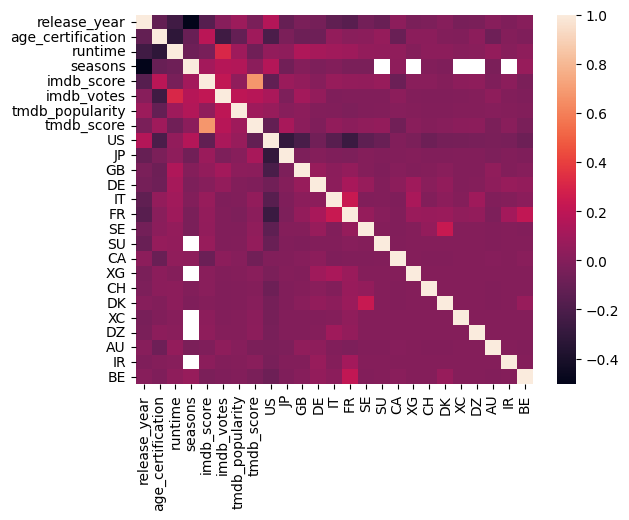

In [20]:
titles_shorten= titles_drop.iloc[:,0:25]
sns.heatmap(titles_shorten.corr())

/var/folders/bb/0rn8mqn14j7cf0cv54wx1k140000gn/T/ipykernel_23703/3831112528.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titles_drop[column], kde=False, ax=ax)


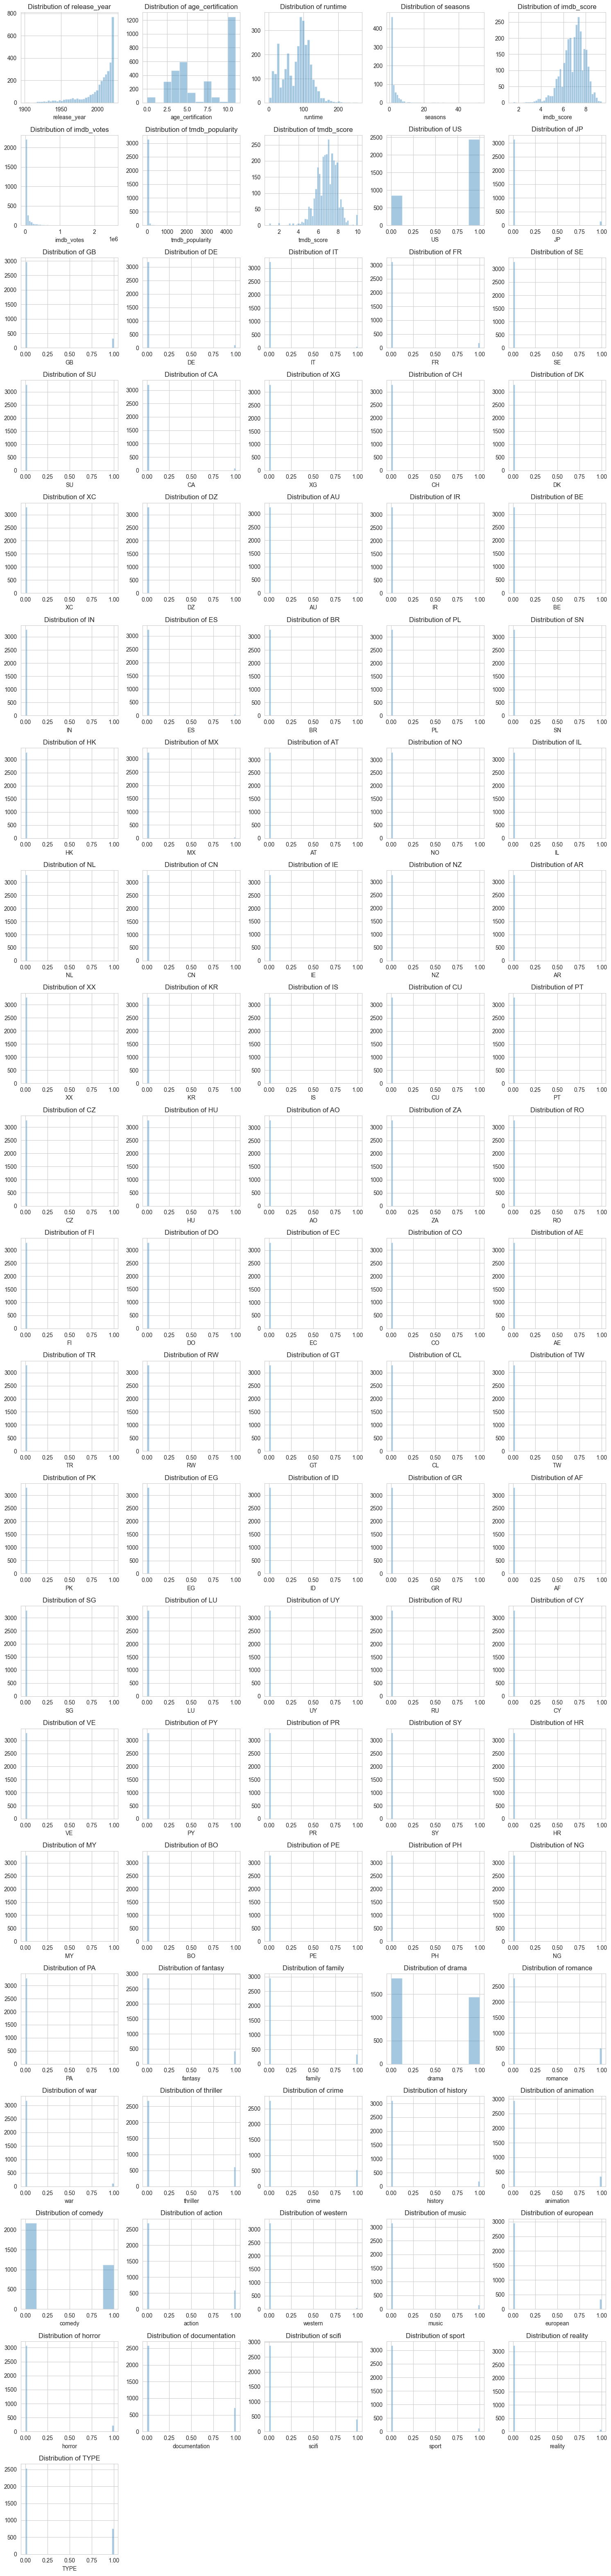

In [21]:
# Get the list of columns
columns = titles_drop.columns
sns.set_style("whitegrid")
# Calculate the number of rows needed
num_columns = len(columns)
num_rows = (num_columns + 4) // 5 

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))


for i, column in enumerate(columns):
    row, col = divmod(i, 5)
    ax = axes[row, col]
    sns.distplot(titles_drop[column], kde=False, ax=ax)
    ax.set_title(f'Distribution of {column}')


for i in range(num_columns, num_rows * 5):
    row, col = divmod(i, 5)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot of Seasons')

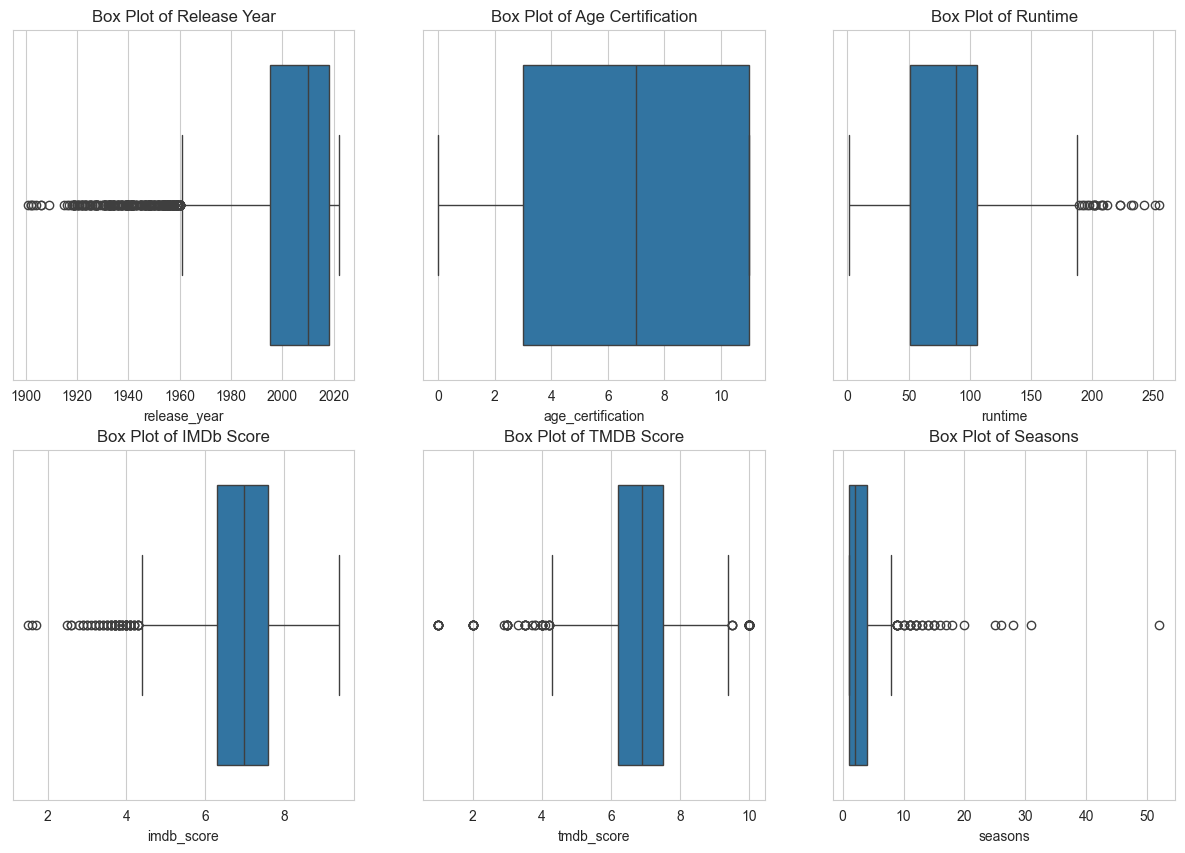

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Box plot for release_year
sns.boxplot(data=titles_drop, x='release_year', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Release Year')

# Box plot for age_certification
sns.boxplot(data=titles_drop, x='age_certification', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Age Certification')

# Box plot for runtime
sns.boxplot(data=titles_drop, x='runtime', ax=axes[0, 2])
axes[0, 2].set_title('Box Plot of Runtime')

# Box plot for imdb_score
sns.boxplot(data=titles_drop, x='imdb_score', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of IMDb Score')

# Box plot for tmdbs_score
sns.boxplot(data=titles_drop, x='tmdb_score', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of TMDB Score')

# Box plot for seasons
sns.boxplot(data=titles_drop, x='seasons', ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Seasons')

# Analytics

In [33]:
titles

id                                           title   type  \
0      tm155702                                The Wizard of Oz  MOVIE   
1       tm83648                                    Citizen Kane  MOVIE   
2       tm77588                                      Casablanca  MOVIE   
3       tm82363                                   The Big Sleep  MOVIE   
4       tm84701                              The Maltese Falcon  MOVIE   
...         ...                                             ...    ...   
3289  tm1082718  Romeo Santos: Utopia Live from MetLife Stadium  MOVIE   
3290  tm1067128                                       Algo Azul  MOVIE   
3291  tm1121489                        Entre Nos: What She Said  MOVIE   
3292  tm1121486                        Entre Nos: The Winners 2  MOVIE   
3293   tm989132                             The Infamous Future  MOVIE   

                                            description  release_year  \
0     Young Dorothy finds herself in a magical world...          1939   
1     Newspaper magnate, Charles Foster Kane is take...          1941   
2     In Casablanca, Morocco in December 1941, a cyn...          1942   
3     Private Investigator Philip Marlowe is hired b...          1946   
4     A private detective takes on a case that invol...          1941   
...                                                 ...           ...   
3289  In this Concert he focuses on the star and mos...          2021   
3290                     Romantic comedy...coming soon.          2021   
3291  A stand-up comedy special featuring Shari Diaz...          2021   
3292  Comedy special starring winners of the second ...          2021   
3293  The untold story of New York City's Eagle Acad...          2021   

      age_certification  runtime                    genres  \
0                     0      102           fantasy, family   
1                     2      119                     drama   
2                     2      102       drama, romance, war   
3                    11      116           thriller, crime   
4                    11      100  thriller, romance, crime   
...                 ...      ...                       ...   
3289                 11      103            romance, music   
3290                 11       90                    comedy   
3291                 11       28                    comedy   
3292                 11       28                    comedy   
3293                 11       40             documentation   

     production_countries  seasons  ... action  western  music  european  \
0                      US      NaN  ...      0        0      0         0   
1                      US      NaN  ...      0        0      0         0   
2                      US      NaN  ...      0        0      0         0   
3                      US      NaN  ...      0        0      0         0   
4                      US      NaN  ...      0        0      0         0   
...                   ...      ...  ...    ...      ...    ...       ...   
3289                   PR      NaN  ...      0        0      1         0   
3290                   PA      NaN  ...      0        0      0         0   
3291                           NaN  ...      0        0      0         0   
3292                           NaN  ...      0        0      0         0   
3293                   US      NaN  ...      0        0      0         0   

      horror  documentation  scifi  sport  reality  TYPE  
0          0              0      0      0        0     0  
1          0              0      0      0        0     0  
2          0              0      0      0        0     0  
3          0              0      0      0        0     0  
4          0              0      0      0        0     0  
...      ...            ...    ...    ...      ...   ...  
3289       0              0      0      0        0     0  
3290       0              0      0      0        0     0  
3291       0              0      0      0        0     0  

In [44]:
# amount movie and show by age
px.bar(data_frame=titles, x='age_certification', y='tmdb_score',color='type')

In [52]:
# amount of movies and shows by country

selected_columns = titles.columns[15:89] 

fig = px.bar(data_frame=titles, x=selected_columns, y='type',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

# Predictive Analytics 

In [23]:
titles_drop=titles_drop.drop(columns=['seasons','imdb_votes','tmdb_popularity'])

In [24]:
titles_drop=titles_drop.dropna()
titles_drop

release_year  age_certification  runtime  imdb_score  tmdb_score  US  \
0             1939                  0      102         8.1         7.6   1   
1             1941                  2      119         8.3         8.0   1   
2             1942                  2      102         8.5         8.2   1   
3             1946                 11      116         7.9         7.7   1   
4             1941                 11      100         8.0         7.8   1   
...            ...                ...      ...         ...         ...  ..   
3275          2021                 11      106         6.3         5.9   0   
3279          2021                 11       26         6.8        10.0   1   
3283          2021                  4       58         3.8         5.4   1   
3284          2021                 11       61         5.8         7.0   0   
3290          2021                 11       90         5.9         2.0   0   

      JP  GB  DE  IT  ...  action  western  music  european  horror  \
0      0   0   0   0  ...       0        0      0         0       0   
1      0   0   0   0  ...       0        0      0         0       0   
2      0   0   0   0  ...       0        0      0         0       0   
3      0   0   0   0  ...       0        0      0         0       0   
4      0   0   0   0  ...       0        0      0         0       0   
...   ..  ..  ..  ..  ...     ...      ...    ...       ...     ...   
3275   0   0   0   0  ...       0        0      0         0       0   
3279   0   0   0   0  ...       0        0      0         0       0   
3283   0   0   0   0  ...       0        0      0         0       0   
3284   0   0   0   0  ...       0        0      0         0       0   
3290   0   0   0   0  ...       0        0      0         0       0   

      documentation  scifi  sport  reality  TYPE  
0                 0      0      0        0     0  
1                 0      0      0        0     0  
2                 0      0      0        0     0  
3                 0      0      0        0     0  
4                 0      0      0        0     0  
...             ...    ...    ...      ...   ...  
3275              0      0      0        0     0  
3279              0      0      0        0     0  
3283              0      0      0        0     0  
3284              0      0      0        0     0  
3290              0      0      0        0     0  

[2760 rows x 98 columns]

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = titles_drop.drop(columns=['tmdb_score'])
y = titles_drop['tmdb_score']


In [26]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:

# Make predictions on the testing data
y_pred = model.predict(X_test)



In [29]:

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.6142563165359732
R-squared (R2) Score: 0.38703403331178987


In [31]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.53298983464508


In [32]:
print(f"intercept: {model.intercept_}")
intercept: 5.633333333333329

print(f"slope: {model.coef_}")

intercept: -0.8111310413380552
slope: [ 1.40761745e-03  2.08959520e-03  1.94642635e-03  6.71028392e-01
 -5.95126516e-02  1.27204361e-01 -3.54008682e-02 -5.17831230e-02
  4.09469644e-03  9.80912551e-02  2.29623974e-01  1.49165512e-01
 -5.25853008e-02  1.24900090e-15  1.47004289e-01  1.29880879e-01
 -2.07039362e-02  2.61550007e-01 -9.07825354e-02  1.85820169e-01
 -2.11790018e-01 -9.76155455e-02 -4.19055830e-02  1.16105564e+00
  6.07225167e-02  2.07152568e-01 -1.44756182e-01 -2.26650987e-01
 -3.78992306e-01 -5.39635786e-01  1.10554045e-01  5.65834500e-02
  1.57306902e-01  6.82612698e-02 -1.73047620e-01  1.48050613e-01
  1.29844736e-01 -7.13421693e-01  3.22591986e-02  4.59802819e-01
 -3.52281457e-01 -7.47783206e-01  2.61505283e-01 -7.48085550e-02
  2.83163532e-01  6.22072025e-01 -1.33665479e-01  3.46340962e-01
  2.11402819e-02  1.70957014e-01 -3.78636744e-01 -3.09807619e-01
 -4.44089210e-16  9.20235590e-01 -3.77369132e-01  1.80953769e-01
 -4.44089210e-16  6.10622664e-16 -7.74603126e-01  2.

# Summary